In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('homeprices.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


# Dummies Column on the basic of categories in the town

In [3]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


# concatinate two dfs

In [4]:
df2 = pd.concat([df, dummies], axis = 1)
df2.head()

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0


# no Need of column town now coz we already get our data
so simply drop it

In [5]:
df2 = df2.drop('town', axis = 1)
df2.head()

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0


<h3 style='color:purple'>Dummy Variable Trap</h3>

When you can derive one variable from other variables, they are known to be multi-colinear. Here
if you know values of california and georgia then you can easily infer value of new jersey state, i.e. 
california=0 and georgia=0. There for these state variables are called to be multi-colinear. In this
situation linear regression won't work as expected. Hence you need to drop one column. 

**NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the state columns it is going to work, however we should make a habit of taking care of dummy variable trap ourselves just in case library that you are using is not handling this for you**

In [6]:
df2.drop('west windsor', axis = 1, inplace = True)
df2.head()

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0


In [7]:
x = df2.drop('price', axis = 1)
y = df2.price

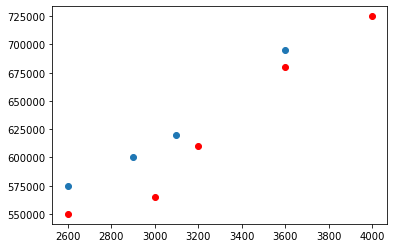

In [8]:
import matplotlib.pyplot as plt
df3 = df2[df2['monroe township'] == 1]
df4 = df2[df2['robinsville'] == 1]
plt.scatter(df3['area'],df3.price, color = 'red')
plt.scatter(df4['area'],df4.price)
# a linear relationship

# linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [10]:
model.score(x,y)

0.9573929037221873

In [11]:
model.predict([[3400,0,0]])

C:\Users\seher\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

# Now using sklearn for one hot encoding 

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
# we create a  new df bcs we already perform encoding on the previous df
dfle = df
dfle.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [14]:
dfle.town = le.fit_transform(dfle.town)
dfle.head()

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000


# Values of x and y as an 2D Array
that why we used values.
without values we will get dataframe

# one hot encoder need array of list as an input to perform any operation so we need to convert it into the array, bcz we need to train model, so X is required in two dimensional array

In [15]:
x = dfle[['town', 'area']].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [16]:
y = dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

# use hotencoder to create dummy variables

In [17]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [19]:
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [22]:
x = ohe.fit_transform(x[:,0:1]).toarray()
x.shape

(13, 2)

In [23]:
x

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])